In [1]:
from math import pi
import math
from tqdm import tqdm
import numpy as np 
import matplotlib.pyplot as plt
from random import randint
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [26]:
#defining intial varivales
L = 1 #length of the box
density = 0.2 #fraction of area occupied by the balls on table
N = 10 #number of atoms
Ratom = math.sqrt(density/(pi*N)) #radius of the ball

## List indexing all pairs of atoms.
pairs = [[i,j] for i in range(N) for j in range(i+1, N)] 
## Positions and velocities of disks.

equilib_sep = L/(N+1)

positions = np.array([(0.25,0.2),(0.25,0.4),(0.25,0.6),(0.25,0.8),
             (0.50,0.2),(0.50,0.4),(0.50,0.6),(0.50,0.8),
             (0.75,0.4),(0.75,0.6)])

velocities = np.array([(0.,0.) for _ in range(10)])


speed = math.sqrt(2.5)
theta = 2*np.pi*np.random.random() #random angle to give random direction

chosen_one = randint(0,10) #chooseing a random particle to give velocity

velocities[chosen_one] = (speed*np.cos(theta), speed*np.sin(theta))

const_KE = np.dot(velocities[chosen_one],velocities[chosen_one])

T = const_KE/N
print(T)

KE_list = [const_KE] #total kinetic energy to keep track of


t = 0.0 # Initial time.
n_events = 20000 # Number of collision events.
time_list = [t]

0.25000000000000006


In [3]:
def wall_time(coord, velcomp, rad):  
    if velcomp > 0.0:
        del_t = (1.0 - rad - coord) / velcomp #we are taking edge length to be 1 here modify 1 with edge length
    elif velcomp < 0.0:
        del_t = (coord - rad) / abs(velcomp) #or can go as (rad - coord)/velcomp
    else:
        del_t = float('inf') #float inf is stored as very big number in python
    return del_t


# Function to calculate time it takes for a pair of particles to collide. 
# pos1 and pos2 are positions of particles 1 and 2, vel1 and vel2 are their 
# velocities. rad is the radius of the particles. 
def pair_time(pos1, vel1, pos2, vel2, rad):  
    rel_pos = pos2 - pos1
    rel_vel = vel2 - vel1
    rel_dist_squar = np.dot(rel_pos,rel_pos)
    rel_speed_squar = np.dot(rel_vel,rel_vel)
    scal_prod = np.dot(rel_pos,rel_vel)
    a = scal_prod ** 2 - rel_speed_squar * ( rel_dist_squar - 4.0 * rad **2) #a is just another parameter
    if a > 0.0 and scal_prod < 0.0: ## Conditions for collision.
        del_t = - (scal_prod + np.sqrt(a)) / rel_speed_squar ## Collision time.
    else:
        del_t = float('inf')
    return del_t


# Function to generate an image of the disk configuration in the box.
def create_picture(positions):
    plt.cla()
    plt.gca().set_aspect('equal')
    plt.axis([0, L, 0, L])
    plt.setp(plt.gca(), xticks=[0, L], yticks=[0, L])
    for x,y in positions:
        atom = plt.Circle((x, y), Ratom, fc='r')
        plt.gca().add_patch(atom)

In [21]:
Speed_list = []
Ux_list = []
for event in tqdm(range(n_events)):
    # Wall collision times for all disks and their velocity components.
    wall_times = [wall_time(positions[i][j], velocities[i][j], Ratom) for i in range(N) for j in range(2)]
    # Pair collision times
    pair_times = [pair_time(positions[i], velocities[i], positions[j], velocities[j], Ratom) for i,j in pairs] 
    # The next collision event is the minimum of wall and pair collision times.
    next_event = min(wall_times + pair_times)  
    t += next_event 
    for i in range(N):
        positions[i] += velocities[i]*next_event # Evolve positions to collision event
    if min(wall_times) < min(pair_times): # Check if next event is a collision with a wall or pair collions
        wall_index = wall_times.index(next_event)
#         print(wall_index)
        particle, component = divmod(wall_index, 2) ##)How does that even work?
        velocities[particle][component] *= -1.0 ## Velocity component normal to wall changes sign
    else:
        pair_index = pair_times.index(next_event)
        particle_1, particle_2 = pairs[pair_index] # Indices of particles participating in collision.
        rel_pos = positions[particle_2] - positions[particle_1]
        rel_vel = velocities[particle_2] - velocities[particle_1]
        distance = np.sqrt(np.dot(rel_pos,rel_pos))
        unit_perp = rel_pos/distance
        scal_prod = np.dot(rel_vel,unit_perp)
        velocities[particle_1] += scal_prod*unit_perp # Change in velocities of atoms colliding with each other
        velocities[particle_2] -= scal_prod*unit_perp
    
    speed_of_all = [np.dot(i,i) for i in velocities]
    KE_list.append(sum(speed_of_all))
    time_list.append(t)
    
    if event>1000:
        for atom in range(N):
            v_list = (np.sqrt(np.dot(velocities[atom], velocities[atom]))) #A list with all speeeds
            Ux_list.append((velocities[atom][0]))
#             v_list = (velocities[atom][0]) #A list with all speeed
            Speed_list.append(v_list)

100%|██████████████████████████████████| 20000/20000 [00:16<00:00, 1217.94it/s]


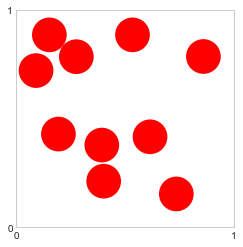

In [5]:
create_picture(positions)

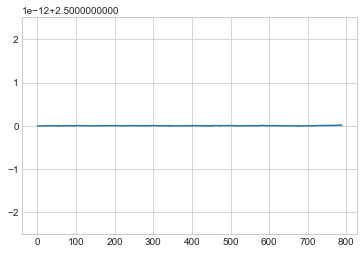

In [6]:
plt.plot(time_list, KE_list)

In [9]:
def max_dist(u):
    return (2*u/T)*np.exp(-(u*u/T))

us = np.linspace(0,1.2,100)
uus = max_dist(us)

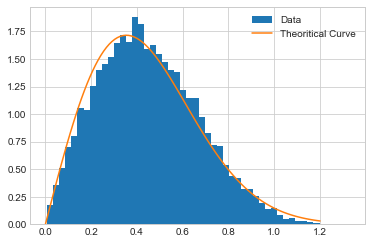

In [10]:
plt.hist(Speed_list, bins=50, density= True, label ='Data');
plt.plot(us,uus, label ='Theoritical Curve');
plt.legend();

In [ ]:
plt.plot(us,uus)

In [24]:
def max_dist_one(u):
    return np.exp(-u*u/T)

us = np.linspace(-1,1,100)
uxs = max_dist_one(us)

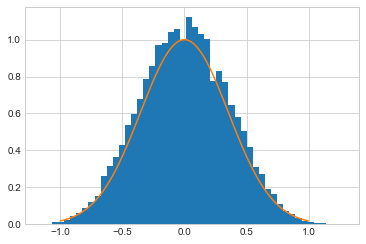

In [39]:
plt.hist(Ux_list, bins=50, density=True);
plt.plot(us, uxs)

In [34]:
vx = np.array(Ux_list)
v_rms = sum(vx**2)/len(vx)
v_rms*math.sqrt(2.5)

0.19997438381544796